In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Load two datasets
Observations = pd.read_csv('observations.csv')
Species = pd.read_csv('species_info.csv')

print(Observations.head())
Species.head()

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [2]:
Observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [3]:
Species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [6]:
print(Observations.describe(include='all'), '\n')
print(Species.describe(include='all'))

         scientific_name               park_name  observations
count              23296                   23296  23296.000000
unique              5541                       4           NaN
top     Myotis lucifugus  Yosemite National Park           NaN
freq                  12                    5824           NaN
mean                 NaN                     NaN    142.287904
std                  NaN                     NaN     69.890532
min                  NaN                     NaN      9.000000
25%                  NaN                     NaN     86.000000
50%                  NaN                     NaN    124.000000
75%                  NaN                     NaN    195.000000
max                  NaN                     NaN    321.000000 

              category    scientific_name   common_names conservation_status
count             5824               5824           5824                 191
unique               7               5541           5504                   4
top     Vas

/Users/bdogellis/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='conservation_status', ylabel='count'>

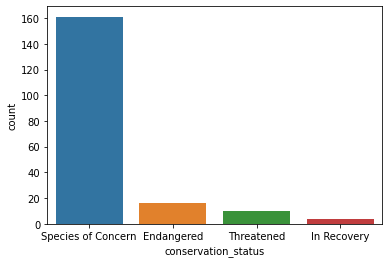

In [7]:
sns.countplot(Species.conservation_status)

<AxesSubplot:xlabel='observations', ylabel='Count'>

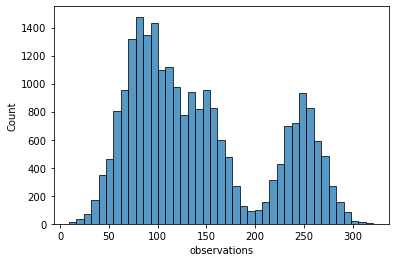

In [8]:
sns.histplot(Observations.observations)

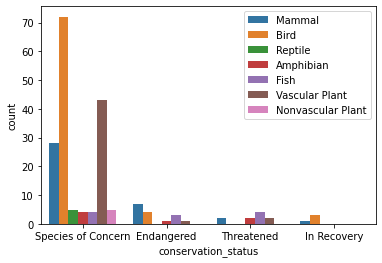

In [12]:
sns.countplot(x = 'conservation_status', data=Species, hue='category')
plt.legend(loc='upper right')

<ipython-input-30-a61a3e1ddca2>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


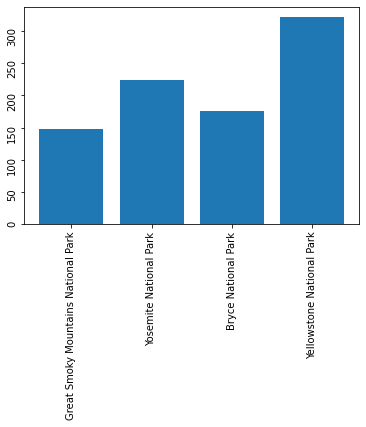

In [30]:
plt.bar('park_name', 'observations', data=Observations)
ax = plt.subplot()
ax.tick_params(labelrotation=90)

In [33]:
Combined = pd.merge(Observations, Species, how='inner')
Combined.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN


In [34]:
Combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25632 non-null  object
 1   park_name            25632 non-null  object
 2   observations         25632 non-null  int64 
 3   category             25632 non-null  object
 4   common_names         25632 non-null  object
 5   conservation_status  880 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


<AxesSubplot:xlabel='conservation_status', ylabel='count'>

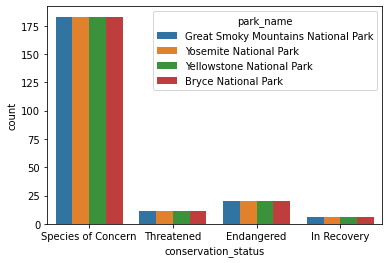

In [35]:
sns.countplot(x='conservation_status', data=Combined, hue='park_name')

/Users/bdogellis/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='park_name', ylabel='count'>

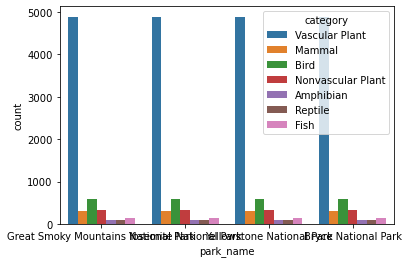

In [37]:
sns.countplot('park_name', hue='category', data=Combined)